In [2]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras import models
from keras.preprocessing import image
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf


Using TensorFlow backend.


In [96]:

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('vgg16_csv_20.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='vgg16')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

(1, 800, 1220, 3)


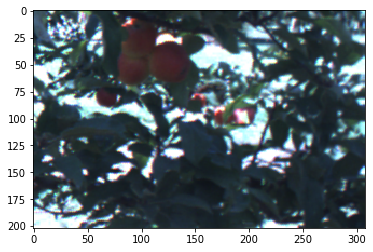

In [99]:
# load image
img = read_image_bgr('20130320T004433.707425.Cam6_54.png')

# preprocess image for network
img = preprocess_image(img)
img, scale = resize_image(img)

# conver image to tensor
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img = read_image_bgr('20130320T004433.707425.Cam6_54.png')
print(img_tensor.shape)
plt.imshow(img[:,:,::-1]);

In [149]:
sub_model = keras.models.Model(inputs=model.input, outputs=model.get_layer('regression_submodel').output)

features = sub_model.predict(img_tensor)

AttributeError: Layer regression_submodel has multiple inbound nodes, hence the notion of "layer output" is ill-defined. Use `get_output_at(node_index)` instead.

In [125]:
features.shape

(1, 25, 38, 256)

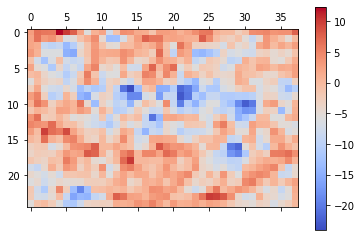

In [148]:
plt.matshow(features[0, :, :,232], cmap='coolwarm')
plt.colorbar();